In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


### Lets compare the muon loss rates from both of the fifth ctag runs

Low momentum: 

High momentum:

---

In [2]:
flow = r.TFile("./data/results_fifthCtag_lowMomentum.root")
fhigh = r.TFile("./data/results_fifthCtag_highMomentum.root")

In [33]:
hlowi = flow.Get("CoincidenceFinderLM/clusterTimecaloNumtriple_").Clone("hlow")
hlow = r.TH3D()
hlowi.Copy(hlow)
hlow.SetDirectory(0)

hhighi = fhigh.Get("CoincidenceFinderLM/clusterTimecaloNumtriple_").Clone("hhigh")
hhigh = r.TH3D()
hhighi.Copy(hhigh)
hhigh.SetLineColor(2)
hhigh.SetDirectory(0)

hlow_single = flow.Get("CoincidenceFinderLM/clusterTimecaloNumsingle_").Clone("hlow_single")
hlow_single.SetDirectory(0)

hhigh_single = fhigh.Get("CoincidenceFinderLM/clusterTimecaloNumsingle_").Clone("hhigh_single")
hhigh_single.SetLineColor(2)
hhigh_single.SetDirectory(0)

ctaghigh =  hhigh_single.Project3D("y").Integral(hhigh_single.GetYaxis().FindBin(24000), -1)
ctaglow =  hlow_single.Project3D("y").Integral(hlow_single.GetYaxis().FindBin(24000), -1)
print(ctaghigh, ctaglow)

hlow.Scale(1/ctaglow)
hhigh.Scale(1/ctaghigh)

#hhigh.Divide(hhigh_single)

43247938.0 45234390.0


In [34]:
type(hlow)

ROOT.TH3D

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


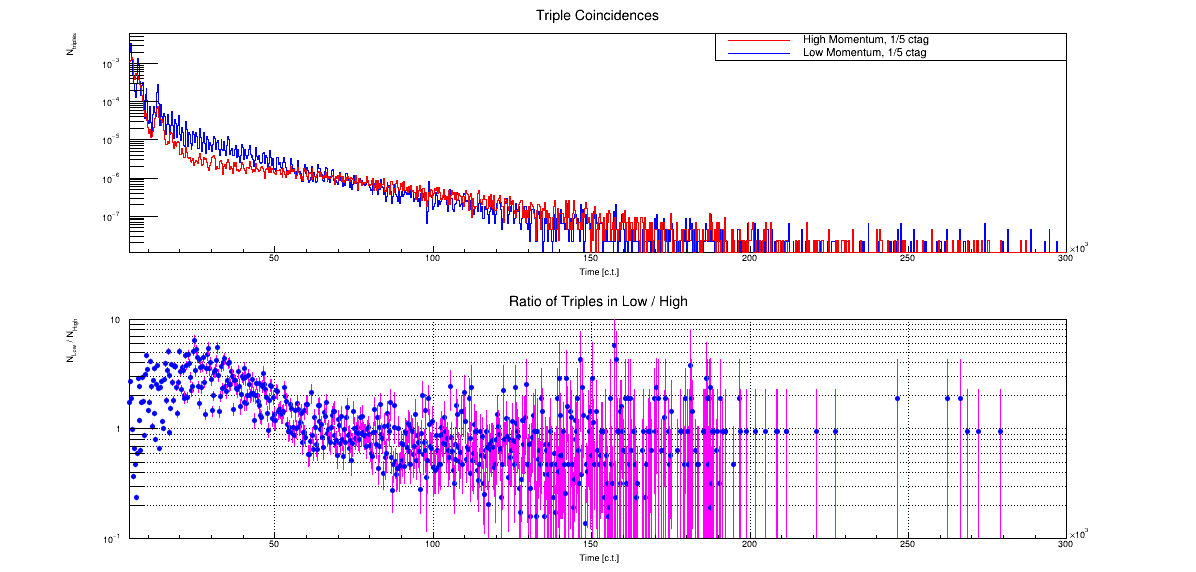

In [40]:
c = r.TCanvas("c","c",1200,600)
c.Divide(1,2)
c.cd(1)

hlow_y = hlow.Project3D("y").Clone()
hlow_y.SetTitle("Triple Coincidences; Time [c.t.]; N_{triples}")
hlow_y.Draw("hist")
#hlow_y.GetYaxis().SetRangeUser(0.000000001,1000000)

hhigh_y = hhigh.Project3D("y").Clone()
hhigh_y.Draw("hist SAME")

leg = r.TLegend(0.6,0.8,0.9,0.9)
leg.AddEntry(hhigh,"High Momentum, 1/5 ctag","l")
leg.AddEntry(hlow,"Low Momentum, 1/5 ctag","l")
leg.Draw("SAME")

r.gPad.SetLogy()

c.cd(2)

hratio = hlow_y.Clone("hratio")
hratio.Divide(hhigh_y)
hratio.SetLineColor(6)
hratio.GetYaxis().SetRangeUser(0.1,10)
hratio.SetMarkerStyle(8)
hratio.SetMarkerSize(0.7)
hratio.Draw("p")
r.gPad.SetLogy()
r.gPad.SetGrid()
hratio.SetTitle("Ratio of Triples in Low / High; Time [c.t.]; N_{Low} / N_{High}")

c.Draw()

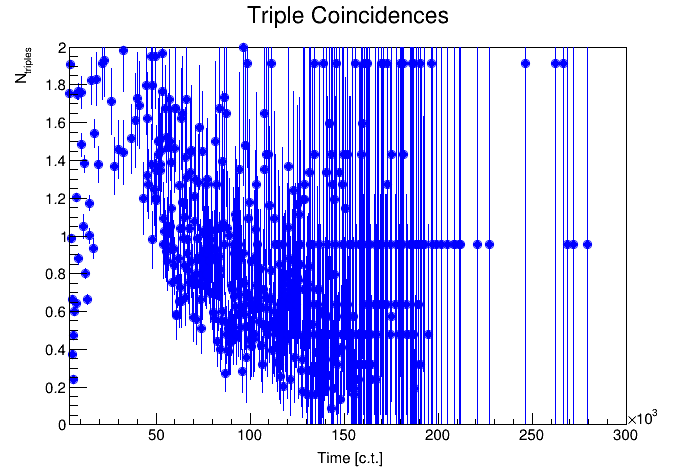

In [41]:
c = r.TCanvas()

hratio = hlow_y.Clone("hratio")
hratio.Divide(hhigh_y)
hratio.Draw("p")
#hratio.SetTitle("Ratio of Triples in Low / High")

hratio.GetYaxis().SetRangeUser(7,1)

c.Draw()

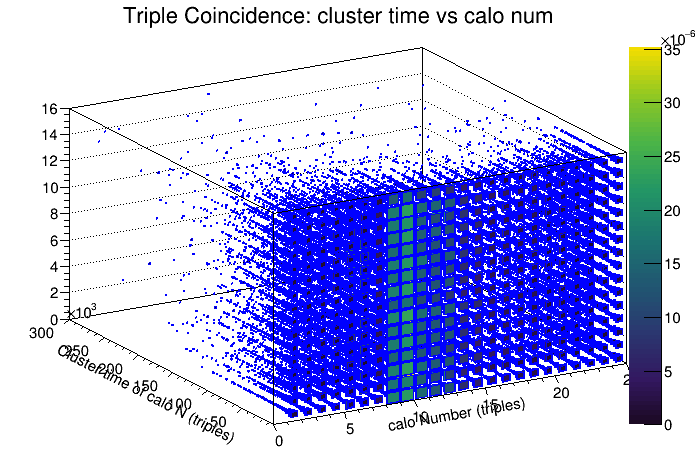

In [42]:
c = r.TCanvas()

hlow.Draw("lego2z")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


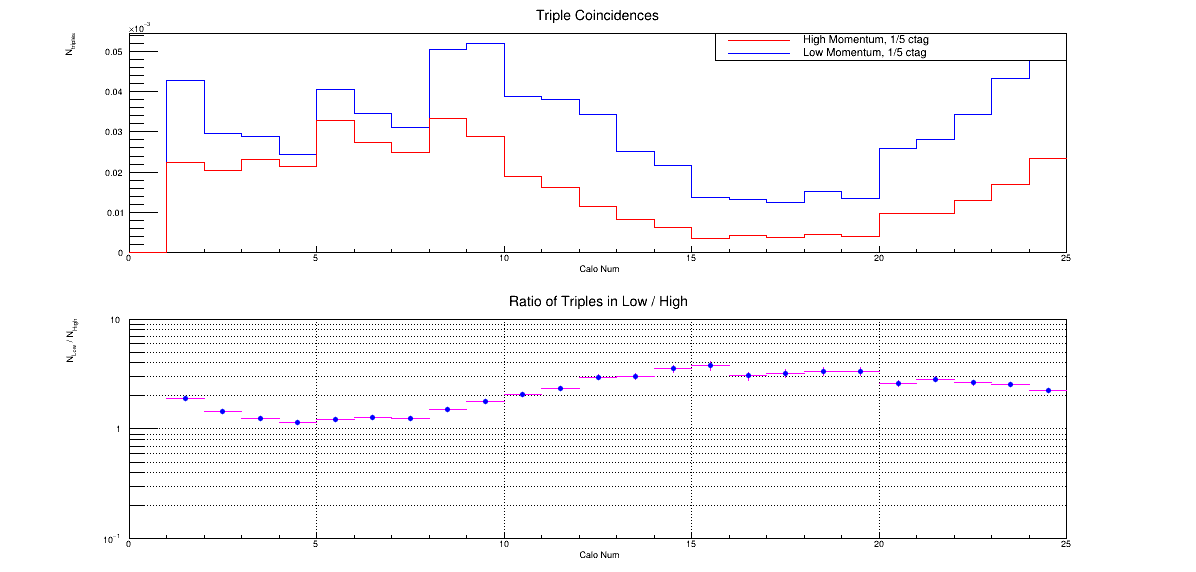

In [44]:
c = r.TCanvas("c","c",1200,600)
c.Divide(1,2)
c.cd(1)

hlow.GetYaxis().SetRangeUser(24000,2000000000)
hhigh.GetYaxis().SetRangeUser(24000,2000000000)

hlow_x = hlow.Project3D("x").Clone()
#hlow_x.Scale(1/hlow_x.Integral())
hlow_x.SetTitle("Triple Coincidences; Calo Num; N_{triples}")
hlow_x.Draw("hist")
#hlow_x.GetYaxis().SetRangeUser(1000,200000)

hhigh_x = hhigh.Project3D("x").Clone()
#hhigh_x.Scale(1/hhigh_x.Integral())

hhigh_x.Draw("hist SAME")

leg = r.TLegend(0.6,0.8,0.9,0.9)
leg.AddEntry(hhigh,"High Momentum, 1/5 ctag","l")
leg.AddEntry(hlow,"Low Momentum, 1/5 ctag","l")
leg.Draw("SAME")

#r.gPad.SetLogy()

c.cd(2)

hratio = hlow_x.Clone("hratio")
hratio.Divide(hhigh_x)
hratio.SetLineColor(6)
hratio.GetYaxis().SetRangeUser(0.1,10)
hratio.SetMarkerStyle(8)
hratio.SetMarkerSize(0.7)
hratio.Draw("p")
r.gPad.SetLogy()
r.gPad.SetGrid()
hratio.SetTitle("Ratio of Triples in Low / High; Calo Num; N_{Low} / N_{High}")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


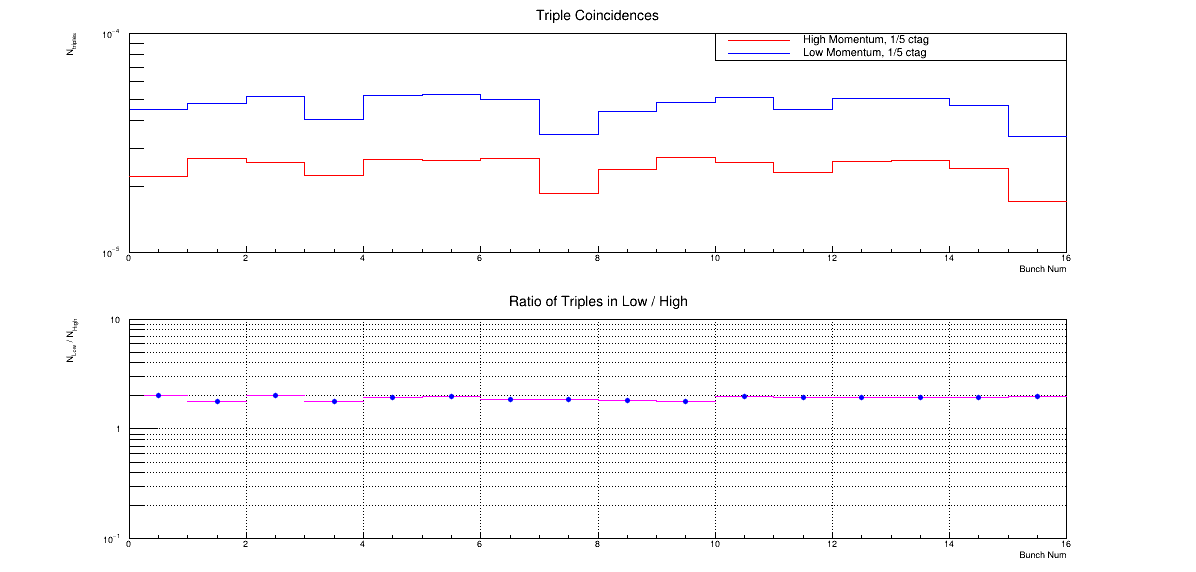

In [57]:
c = r.TCanvas("c","c",1200,600)
c.Divide(1,2)
c.cd(1)

hlow.GetYaxis().SetRangeUser(24000,2000000000)
hhigh.GetYaxis().SetRangeUser(24000,2000000000)

hlow_z = hlow.Project3D("z").Clone()
#hlow_x.Scale(1/hlow_x.Integral())
hlow_z.SetTitle("Triple Coincidences; Bunch Num; N_{triples}")
hlow_z.Draw("hist")
hlow_z.GetYaxis().SetRangeUser(0.00001,.0001)

hhigh_z = hhigh.Project3D("z").Clone()
#hhigh_z.Scale(1/hhigh_x.Integral())

hhigh_z.Draw("hist SAME")

leg = r.TLegend(0.6,0.8,0.9,0.9)
leg.AddEntry(hhigh,"High Momentum, 1/5 ctag","l")
leg.AddEntry(hlow,"Low Momentum, 1/5 ctag","l")
leg.Draw("SAME")

r.gPad.SetLogy()

c.cd(2)

hratio = hlow_z.Clone("hratio")
hratio.Divide(hhigh_z)
hratio.SetLineColor(6)
hratio.GetYaxis().SetRangeUser(0.1,10)
hratio.SetMarkerStyle(8)
hratio.SetMarkerSize(0.7)
hratio.Draw("p")
r.gPad.SetLogy()
r.gPad.SetGrid()
hratio.SetTitle("Ratio of Triples in Low / High; Bunch Num; N_{Low} / N_{High}")

c.Draw()